<a href="https://colab.research.google.com/github/Farhanzii/Business-Inteligence-Batch-3/blob/main/Farhan__explanatory_model_analysis__fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Assignment Instruction Exploratory Data Analysis

Assignment Instruction :

Salah satu perusahaan yang bergerak di bidang asuransi mengalami kesulitan dalam mengatasi dan mengendalikan jumlah kasus fraud. Anda sebagai data scientist yang bekerja di salah satu konsultan manajemen ternama diminta untuk melakukan otomatisasi pada pendeteksian fraud. Anda diberikan dataset dengan metadata sebagai berikut:
months_as_customer: lama user menjadi nasabah dalam hitungan bulan
* age: usia nasabah
* policy_number: nomor polis
* policy_bind_date: tanggal polis
* policy_state: wilayah polis, negara bagian
* policy_csl: Combined single limit polis
* policy_deductable: risiko yang ditanggung bersama
* policy_annual_premium: premi tahunan
* umbrella_limit: limit pembayaran risiko oleh perusahaan asuransi
* insured_zip: kode pos nasabah
* insured_sex: gender nasabah
* insured_education_level: tingkat pendidikan nasabah
* insured_occupation: pekerjaan nasabah
* insured_hobbies: hobi nasabah
* insured_relationship: status hubungan nasabah
* capital-gains: besar gains yang diperoleh dari ganti rugi
* capital-loss: besar loss yang diperoleh dari ganti rugi
* incident_date: tanggal insiden terjadi
* incident_type: tipe insiden
* collision_type: tipe tabrakan
* incident_severity: tingkah keparahan
* authorities_contacted: pihak berwajib yang dihubungi
* incident_state: lokasi insiden, negara bagian
* incident_city: kota terjadinya insiden
* incident_location: lokasi terjadinya insiden
* incident_hour_of_the_day: jam terjadinya insiden
* number_of_vehicles_involved: jumlah kendaraan yang ikut dalam insiden
* property_damage: apakah terdapat kerusakan properti? YES jika ya
* bodily_injuries: jumlah korban luka
* witness: jumlah saksi mata
* police_report_available: apakah terdapat laporan polisi? YES jika ya
* total_claim_amount: total klaim
* injury_claim: klaim untuk luka-luka
* property_claim: klaim untuk kerusakan properti
* vehicle_claim: klaim untuk kerusakan mobil
* auto_make: merek otomotif
* auto_model: model otomotif
* auto_year: tahun pembuatan mobil
* fraud_reported: apakah terlapor sebagai fraud? Y jika ya



# Importing Library





In [1]:
### Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr, stats
from imblearn.over_sampling import SMOTE, ADASYN 
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Importing Files


In [2]:
### Loading Dataset
url = 'https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/car_insurance_fraud_dataset/insuranceFraud.csv'
df = pd.read_csv(url)

# Data Observation

In [3]:
### Data Inspection
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [5]:
### Mengecek Value dalam Kolom
for x in df:
    print(f"Nilai Data {x}")
    print(f"{df[x].unique()}")
    

Nilai Data months_as_customer
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 

# Analisa
Terdapat angka Null yang bukan brupa karakter '?' dan terdapat data outlier yang berupa data minus pada umbrella_limit sehingga harus di transformasi

# Question 1: Missing Value Identification

Identifikasi berapa banyak nilai null yang terdapat di dalam dataset. Perhatian: nilai null pada dataset tidak selalu NA atau NULL **(10 poin)**


In [6]:
### Cek Kolom Umbrella_Limit
df['umbrella_limit'].sort_values(ascending=True)

290    -1000000
0             0
623           0
624           0
625           0
         ...   
657     9000000
458     9000000
975     9000000
430    10000000
115    10000000
Name: umbrella_limit, Length: 1000, dtype: int64

In [7]:
df['umbrella_limit'].iloc[290] = 1000000

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
# Cek Ulang Nilai Kolom
df['umbrella_limit'].iloc[290]

1000000

In [9]:
### Merubah Simbol Data pada dataset
df = df.replace("?", np.nan)

In [10]:
### Menghitung nilai null dalam dataset
Count_null = df.isnull().sum()
print(Count_null[Count_null >= 0].sort_values(ascending=False))

property_damage                360
police_report_available        343
collision_type                 178
auto_model                       0
auto_make                        0
vehicle_claim                    0
property_claim                   0
injury_claim                     0
total_claim_amount               0
incident_severity                0
witnesses                        0
bodily_injuries                  0
auto_year                        0
number_of_vehicles_involved      0
incident_hour_of_the_day         0
incident_location                0
incident_city                    0
incident_state                   0
authorities_contacted            0
months_as_customer               0
age                              0
insured_zip                      0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit      

In [11]:
### Menghitung Total nilai null dalam dataset
Count_null = df.isnull().sum().sum()
print('Total Count =', (Count_null))

Total Count = 881


# Analisa
Melalui inspeksi terhadap data terdapat data yang hilang dan outlier dengan simbol '?' bukan NaN dan data minus

# Question 2: Missing Value Treatment

Lakukan treatment pada kolom yang bernilai NA atau NULL. Berikan alasan anda mengapa anda melakukan treatment tertentu pada nilai NA tersebut. **(10 poin)**


In [12]:
### Merubah Nilai Null menjadi kategori baru
def Merubah_Nilai_Null(df,ColName):
     df[ColName] = np.where(df[ColName].isnull(),"Undocumented",df[ColName])
### Melihat kategori baru
for Columns in ['property_damage','police_report_available','collision_type']:
    Merubah_Nilai_Null(df,Columns)
### Melihat gambaran hasil perubahan
df[['property_damage','police_report_available','collision_type']]

,property_damage,police_report_available,collision_type
0,YES,YES,Side Collision
1,Undocumented,Undocumented,Undocumented
2,NO,NO,Rear Collision
3,Undocumented,NO,Front Collision
4,NO,NO,Undocumented
...,...,...,...
995,YES,Undocumented,Front Collision
996,YES,Undocumented,Rear Collision
997,Undocumented,YES,Side Collision
998,Undocumented,YES,Rear Collision


In [13]:
### Menghitung Jumlah Kategori
print("Jumlah Kategori pada Kolom berikut: ")
for ColName in df[['property_damage','police_report_available','collision_type']]:
    print("{} = {}".format(ColName,len(df[ColName].unique())))

Jumlah Kategori pada Kolom berikut: 
property_damage = 3
police_report_available = 3
collision_type = 4


In [14]:
### Menghitung Total nilai null dalam dataset
Count_null = df.isnull().sum().sum()
print('Total Count =', (Count_null))

Total Count = 0


In [15]:
### Menghitung nilai null dalam dataset
Count_null = df.isnull().sum()
Count_null[Count_null >= 0].sort_values(ascending=False)

months_as_customer             0
witnesses                      0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
police_report_available        0
incident_severity              0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model                     0
auto_year                      0
authorities_contacted          0
collision_type                 0
age                            0
insured_zip                    0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
incident_t

In [16]:
### Melihat Persentase Tiap value
for x in ['property_damage','police_report_available','collision_type']:
  print(f"{df[x].value_counts()/len(df)*100}")

Undocumented    36.0
NO              33.8
YES             30.2
Name: property_damage, dtype: float64
Undocumented    34.3
NO              34.3
YES             31.4
Name: police_report_available, dtype: float64
Rear Collision     29.2
Side Collision     27.6
Front Collision    25.4
Undocumented       17.8
Name: collision_type, dtype: float64


# Analisa

Data missing memiliki proporsi yang cukup tinggi dengan data yang berupa kategorikal sehingga tidak dapat diimputasi jadi diubah menjadi suatu kategori baru lalu nanti dapat dilihat untuk analisa kedepannya apakah perubahan nilai tersebut kedalam kategori baru adalah hal yang tepat

# Question 3: Analisa Variabel Prediktor
Lakukan analisis pada beberapa variabel prediktor dan interpretasikan analisisnya  dengan mengaitkan analisanya dengan variabel target. Pilihlah beberapa variabel yang akan digunakan untuk modeling berdasarkan hasil analisa. **(20 poin)**

In [17]:
### Identifikasi variable/kolom
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [18]:
all_var = list(df.columns)
len(all_var)

39

In [19]:
#continuous variables = ordinal, interval, ratio

cont_var =['age','incident_hour_of_the_day',
           'number_of_vehicles_involved','total_claim_amount',
           'injury_claim','property_claim','vehicle_claim',
           'months_as_customer','policy_annual_premium','policy_deductable',
           'umbrella_limit','capital-gains','capital-loss', 
           'auto_year','witnesses','bodily_injuries','policy_bind_year','incident_severity']

len(cont_var)

18

In [20]:
#ordinal var

ord_var = ['policy_deductable','witnesses','bodily_injuries','incident_severity']
len(ord_var)

4

In [21]:
ord_var

['policy_deductable', 'witnesses', 'bodily_injuries', 'incident_severity']

In [22]:
#quan var = interval or ratio 

quan_var = (list(set(cont_var) - set(ord_var))) 
len(quan_var)

14

In [23]:
#norminal aka discrete var

nom_var = (list(set(all_var) - set(cont_var))) 
len(nom_var)

22

In [24]:
#check for norminal data with vevry large number of categories

for col in nom_var:
    print(col)
    print("  ")
    print(df[col].value_counts())
    print("  ")

insured_relationship
  
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64
  
policy_csl
  
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
  
insured_hobbies
  
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64
  
insured_occupation
  
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-s

In [25]:
#for those that have not too many unique, we can plot them out

large_cat = []

for col in nom_var:
    if df[col].nunique() > 20:
        large_cat.append(col)
        print(col, df[col].nunique())
    else: 
        pass
    
#incident location, insured zip, policy bind date, policy number too many unique to be meaningful

policy_number 1000
incident_date 60
policy_bind_date 951
insured_zip 995
incident_location 1000
auto_model 39


In [26]:
#get a data frame with var that have large num categories
#only auto model 
large_dummy = pd.get_dummies(df[['auto_model','incident_date']], drop_first=True)

#put in the DV
large_dummy['fraud_reported']=df['fraud_reported']

#numerical code the DV
large_dummy['fraud_reported'] = large_dummy['fraud_reported'].map({"Y":1,"N":0})

#unique to each case. wont be useful
large_dummy.head(10)

,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,...,incident_date_2/28/2015,incident_date_2/3/2015,incident_date_2/4/2015,incident_date_2/5/2015,incident_date_2/6/2015,incident_date_2/7/2015,incident_date_2/8/2015,incident_date_2/9/2015,incident_date_3/1/2015,fraud_reported
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#Color negative numbers red, positive blue
def color(val):
    color = 'green' if val ==1 else 'red' if val < -0.3 else 'blue' if val > 0.3 else 'black'   #write like lambda
    return 'color: %s' % color


corr = large_dummy.corr()
corr.style.applymap(color)


#no correlation with make and fraud. drop var

In [28]:
#drop this variables from analysis 

df.drop(large_cat, axis=1, inplace=True)

In [29]:
#redefine the norminal var
#remove dv from the list

nom_var.remove('fraud_reported')
nom_var = (list(set(nom_var) - set(large_cat))) 
len(nom_var)

15

In [30]:
#check columns add up 

print ('total var count:{}'.format(len(list(df.columns))),
       'continous var count:{}'.format(len(cont_var)),
       'norminal var count:{}'.format(len(nom_var)))

total var count:33 continous var count:18 norminal var count:15


In [31]:
df.fraud_reported.value_counts(normalize=True)*100

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

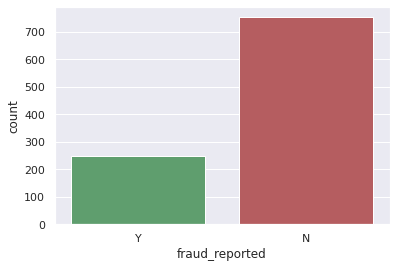

In [32]:
sns.set()
sns.countplot(x ="fraud_reported", data=df, palette=['g','r']);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


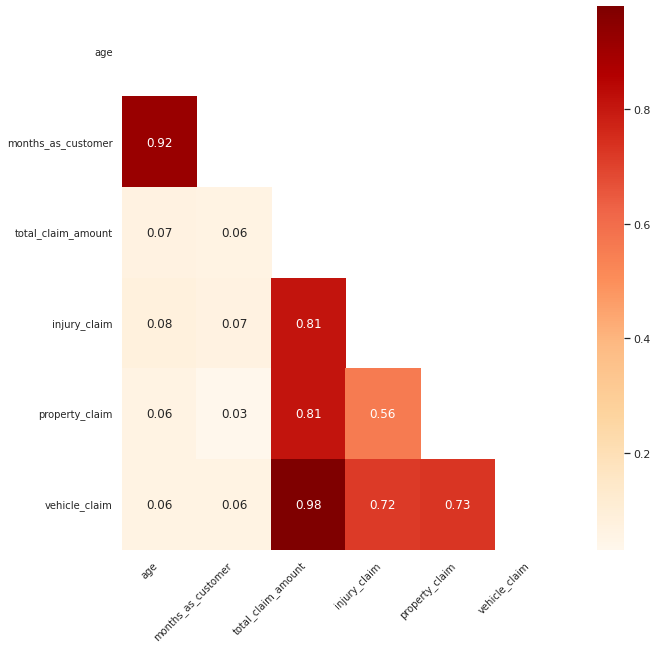

In [33]:
sns.set_style('white')

# heatmap from those with at least 0.3 magnitude in corr, includeing the DV
corr_list=['age','months_as_customer','total_claim_amount',
           'injury_claim', 'property_claim','vehicle_claim',
           'incident_severity','fraud_reported']

corr_df = df[corr_list]
corr=round(corr_df.corr(),2)

# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(10,10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #triu triangle upper

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap='OrRd')

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha= 'right', rotation=45 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()


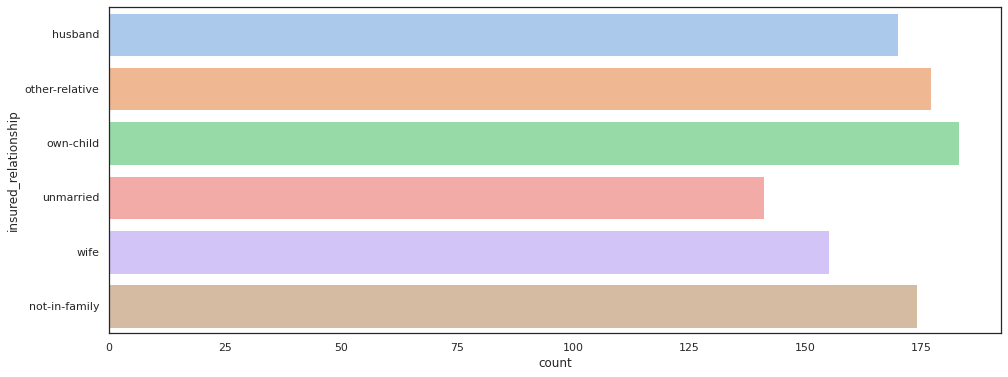

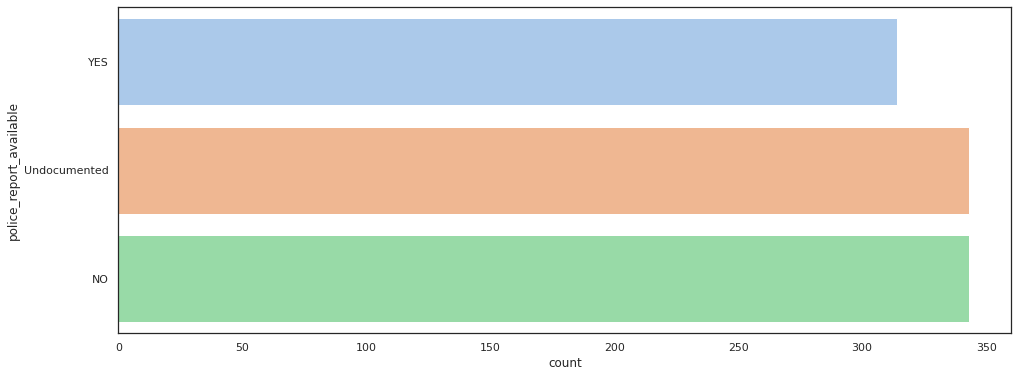

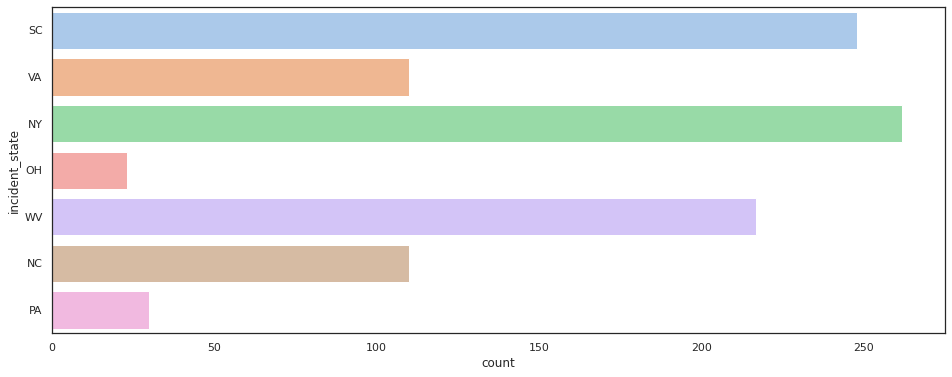

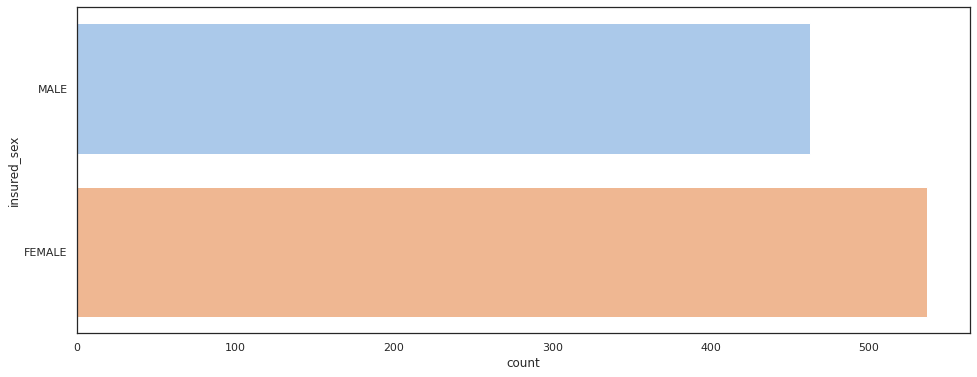

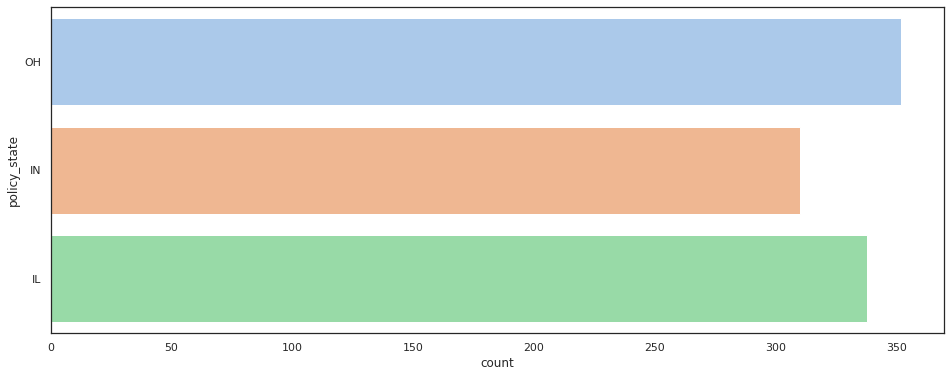

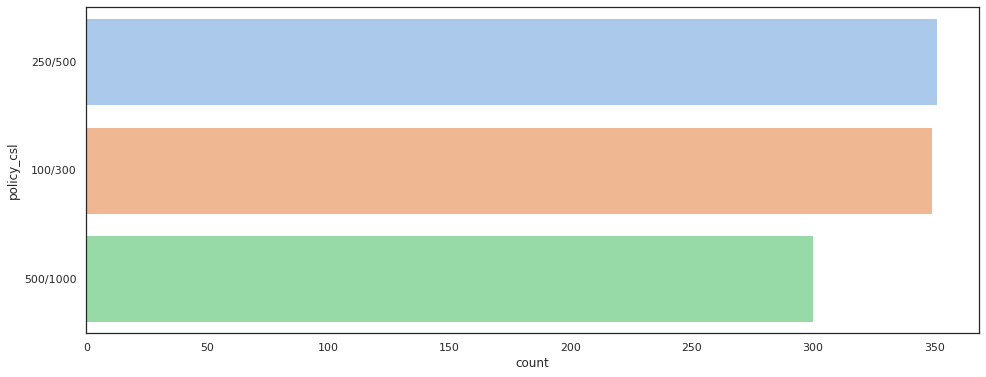

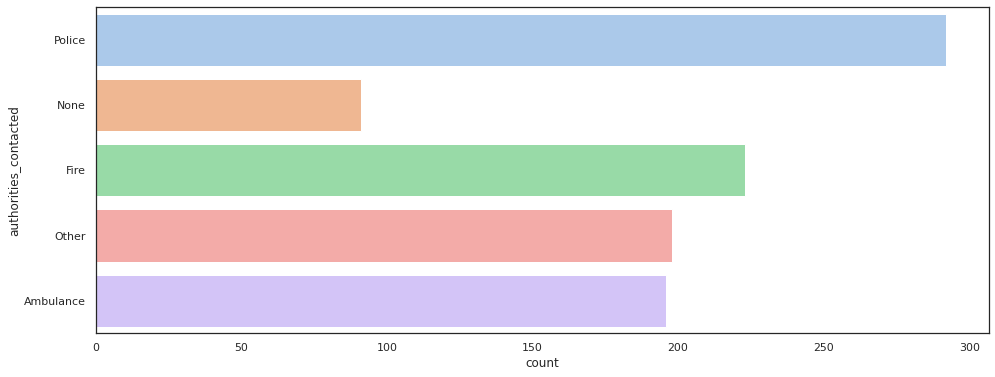

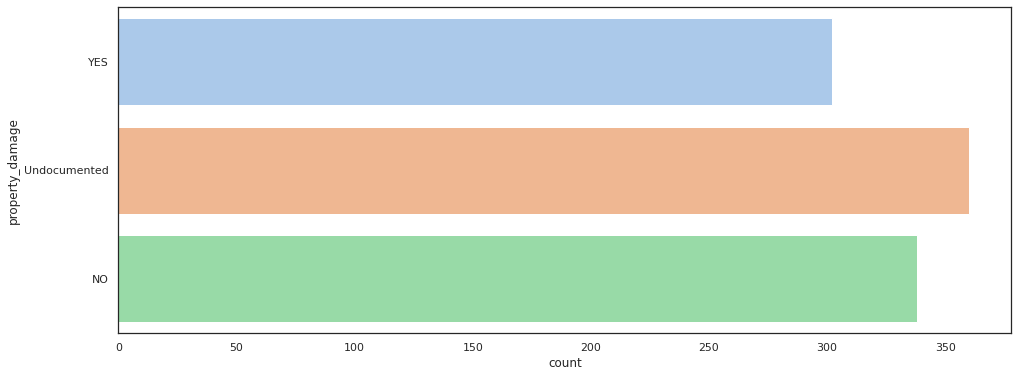

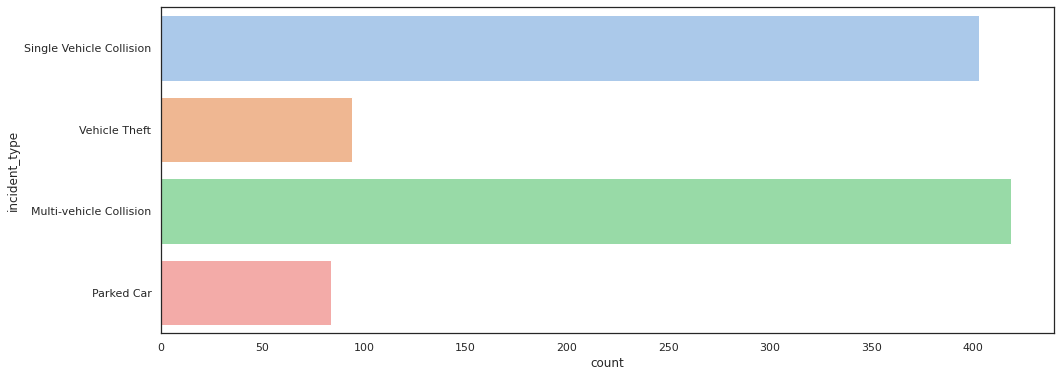

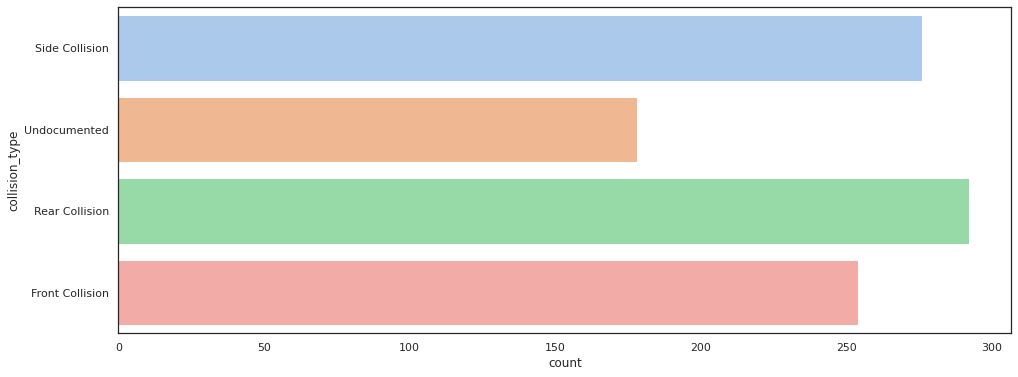

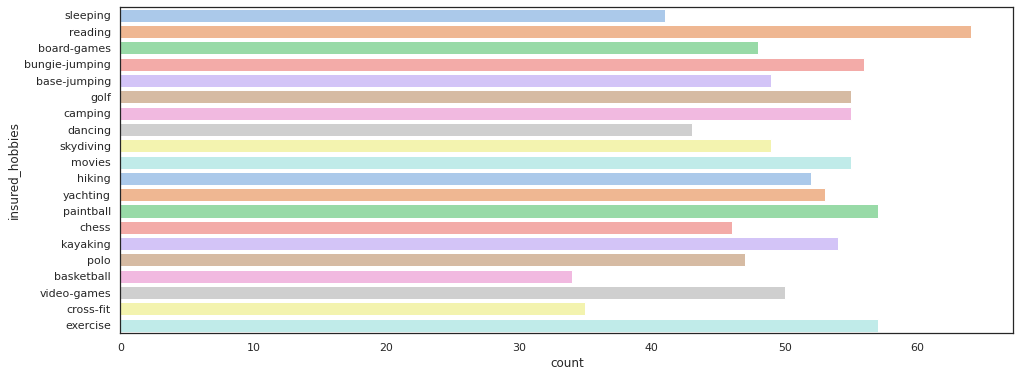

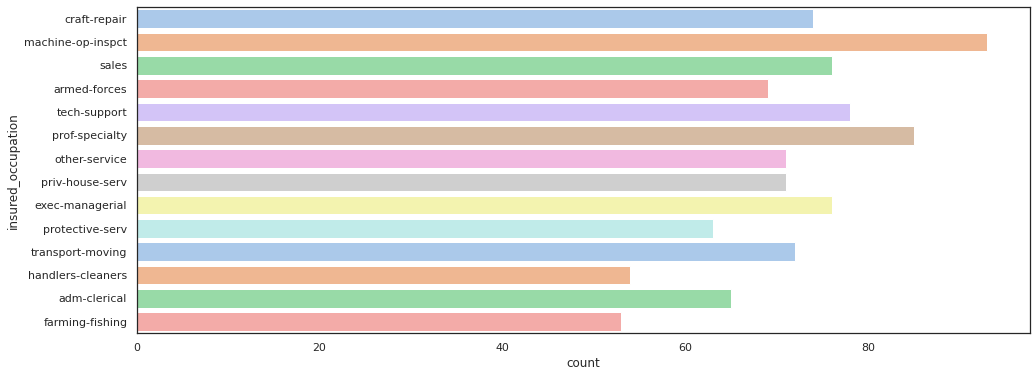

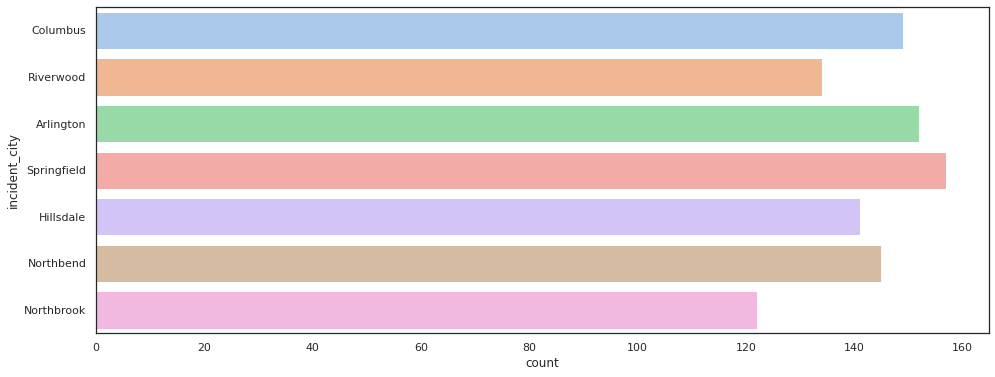

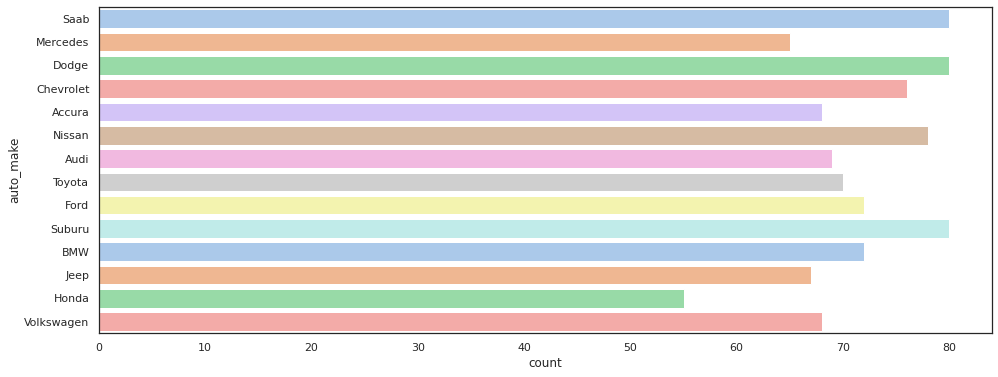

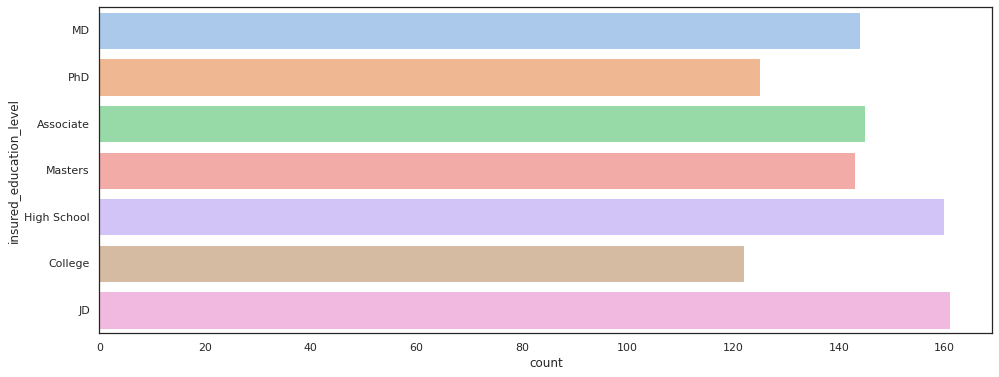

In [34]:
#countplot of discrete var , 

for i, name in enumerate(df[nom_var]):
    plt.figure(i,figsize=(16,6))
    sns.countplot(y=name, data=df, palette="pastel")

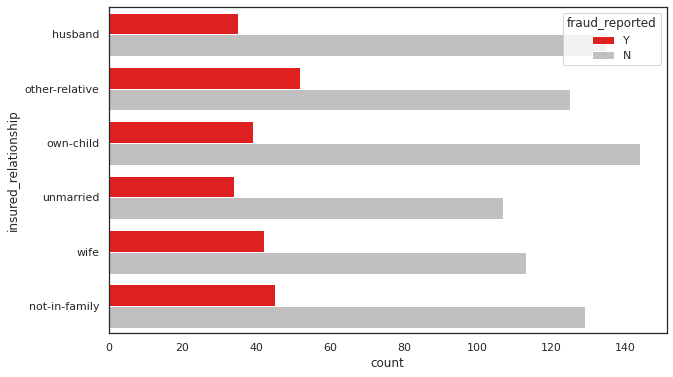

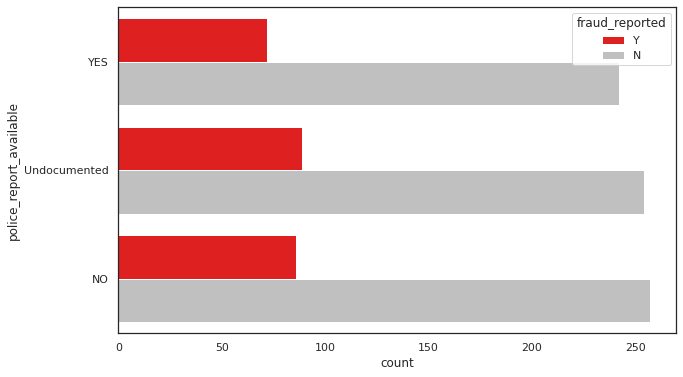

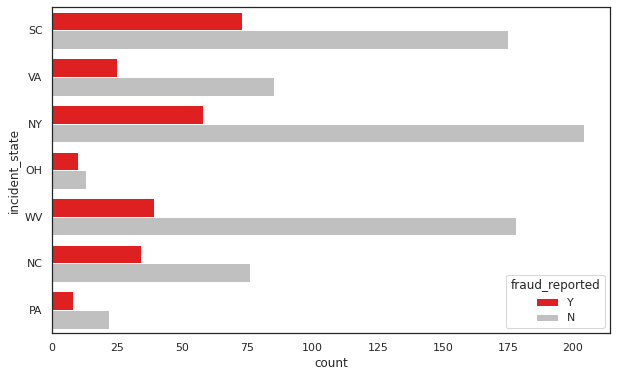

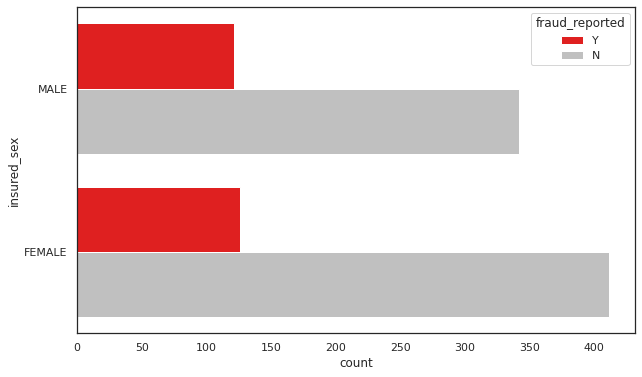

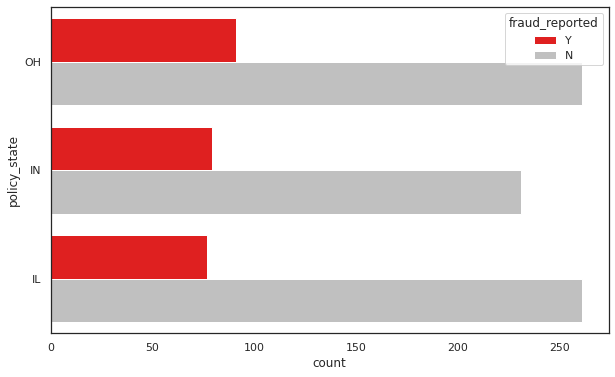

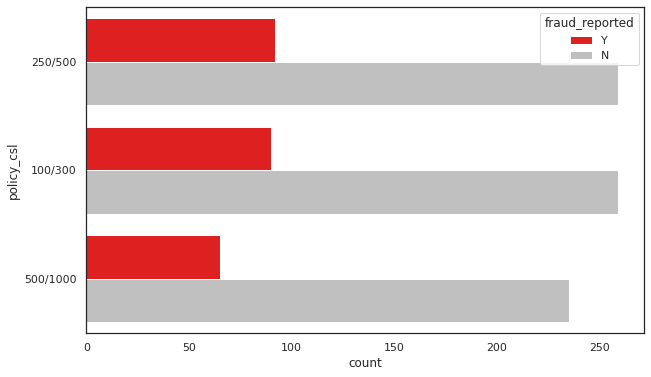

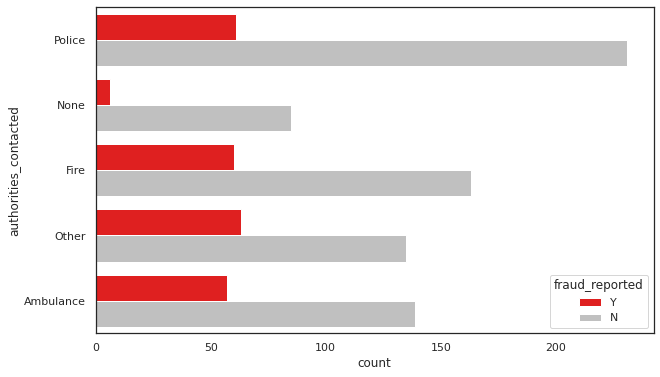

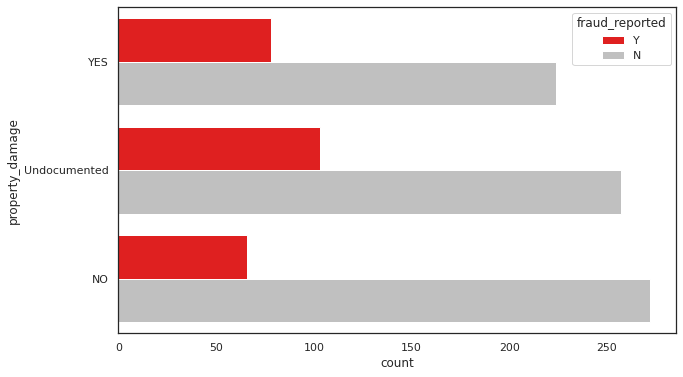

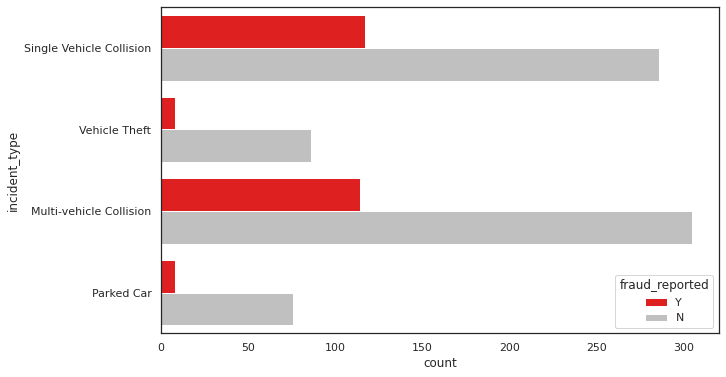

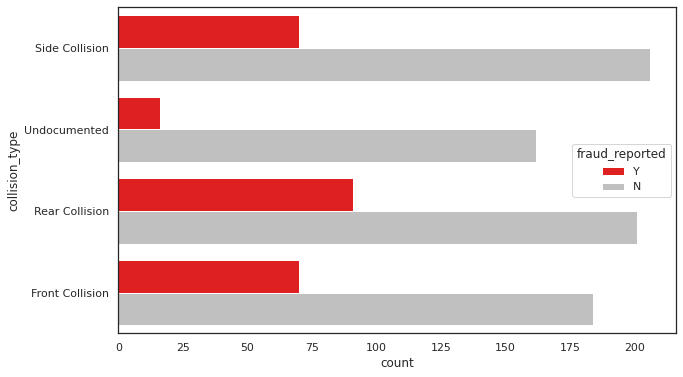

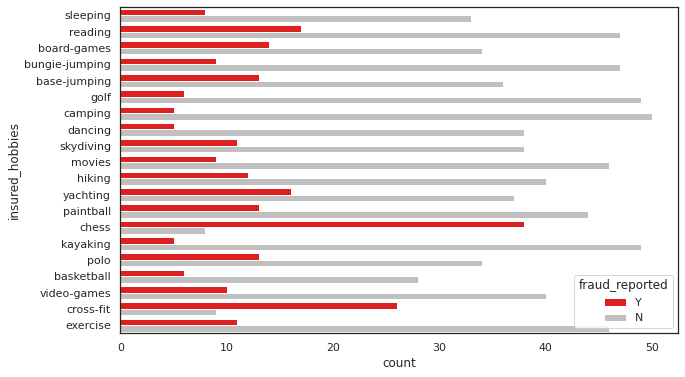

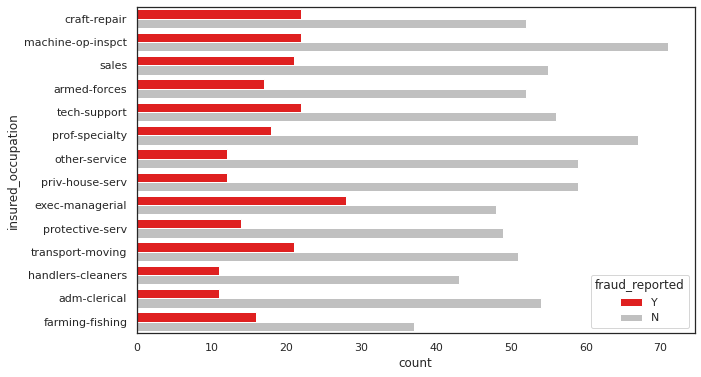

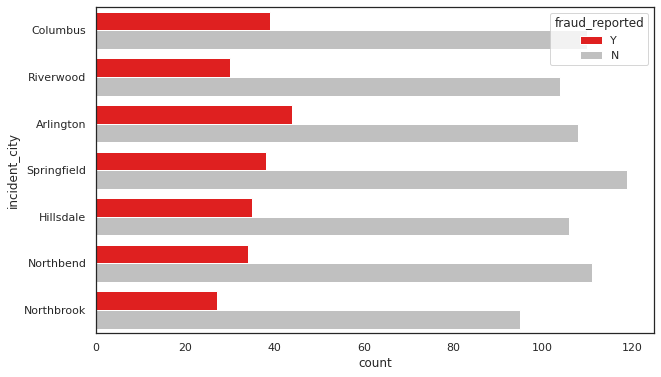

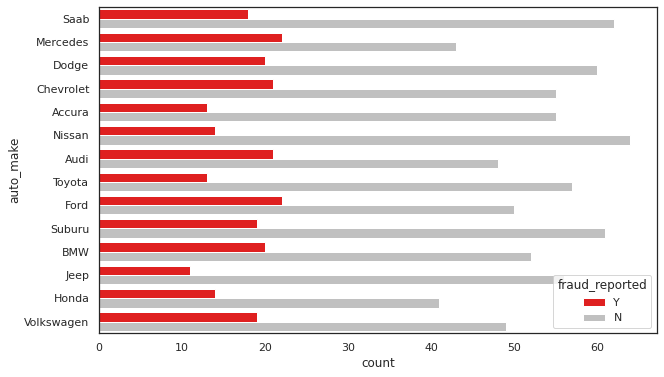

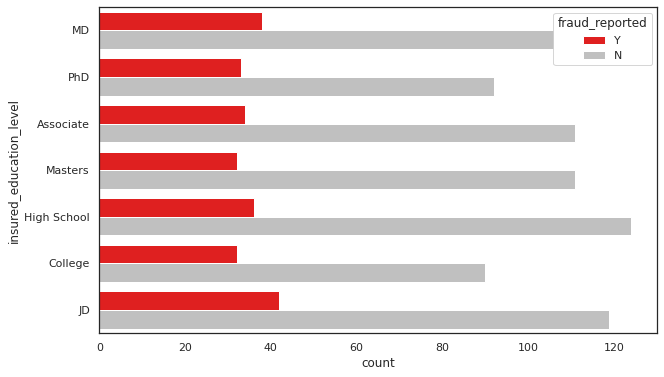

In [35]:
#each discrete var and fraud reported's dist

for i, name in enumerate(df[nom_var]):
    plt.figure(i,figsize=(10,6))
    sns.countplot(y=name, data=df, hue="fraud_reported", palette=['red','silver'])

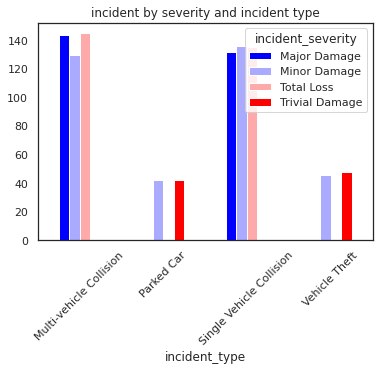

In [36]:
#cross tab of incident type and severity 
#more severe accidents seem to only be present with collision 

incident = pd.crosstab(df['incident_type'], df['incident_severity'])

incident.plot(kind='bar', colormap='bwr',figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and incident type");

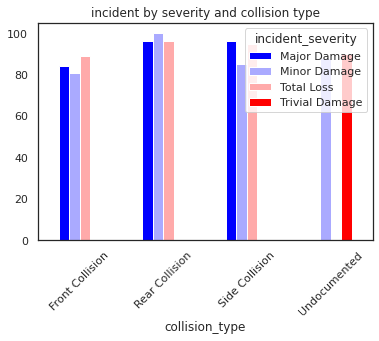

In [37]:
#undocumented collision types tend to be less severe

incident = pd.crosstab(df['collision_type'], df['incident_severity'])

incident.plot(kind='bar', colormap='bwr', figsize=(6,4))
plt.xticks(rotation=45)
plt.title("incident by severity and collision type");

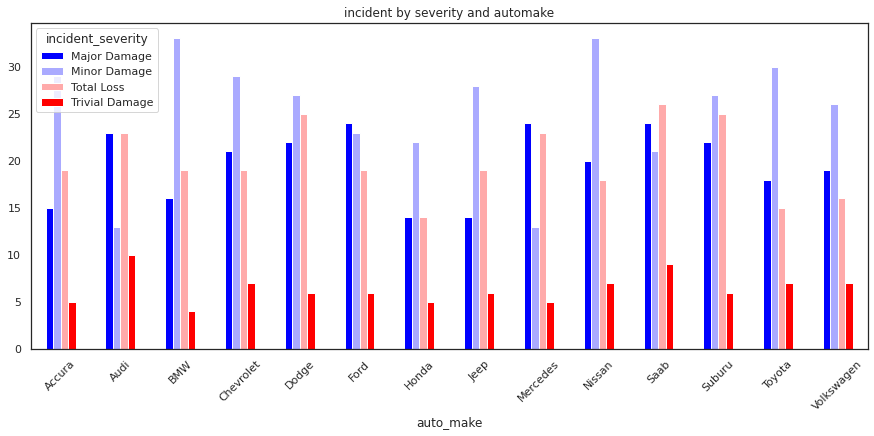

In [38]:
# seems like bmw and nissan gets a lot of minor accident
# fiercer cars like dodge, subaru, saab, merc get into mor severe accident

incident = pd.crosstab(df['auto_make'], df['incident_severity'])
incident.plot(kind='bar', colormap='bwr',figsize=(15,6))
plt.xticks(rotation=45)
plt.title("incident by severity and automake");


Although theft and parked car are less severe, they have more fraud cases. Perhaps due to acrimony and feelings of needing compensation for the perceived unfairness of an accident involving their vehicle while they were not involved or at fault. Rear collision and undocumented have more fraud. I see a trend that less severe accidents have more frauds. There is no obvious trend by sex. Saab, Subaru and Ford seem to have more fraud cases.

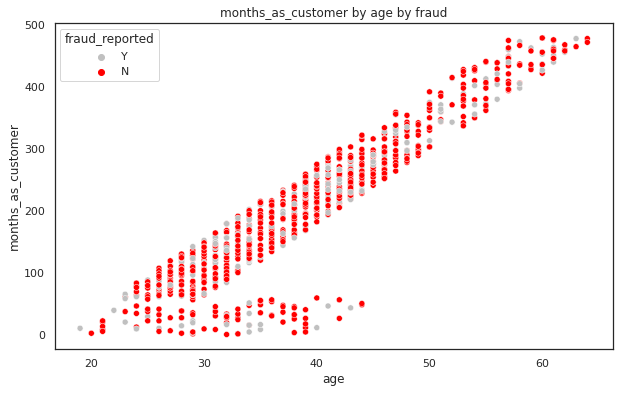

In [39]:
#try to see if there are any iteractions
#dont seem like it 
#a bunch of people across age are relatively new insurance  customers
#the rest are drivers that have insurance over the years.
#no clear pattern of interaction here

plt.figure(figsize=(10, 6))

sns.scatterplot(x="age", y="months_as_customer", 
            hue="fraud_reported", data=df,
            palette=['silver','red'])

plt.title("months_as_customer by age by fraud");

I tried to see if there are any interactions between months as customer and age on fraud but there don’t seem to be. From the graph we can see that a group of people across age are relatively new insurance customers while the rest are drivers that have insurance over the years.

When plotted total claim amount and policy annual premium and fraud as a scatter plot, there were no clear patterns, but I noticed that there seem to be a high density of frauds at lower total claim amounts (lower than $20, 000).

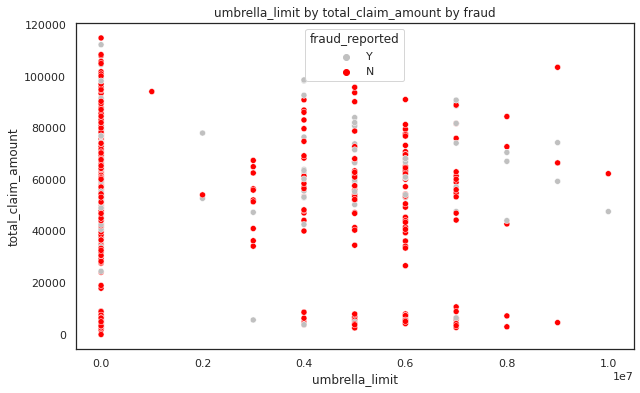

In [40]:
#seems like no umbrella limit more fraud?
#this people may have little to lose which is why they dont perchase umbrella 
#inversely, those who purchase have a lot of asset and a lot to lose so may be less prone to fraud?

plt.figure(figsize=(10, 6))

sns.scatterplot(x="umbrella_limit", y="total_claim_amount", 
            hue="fraud_reported", data=df,
            palette=['silver','red'])

plt.title("umbrella_limit by total_claim_amount by fraud");

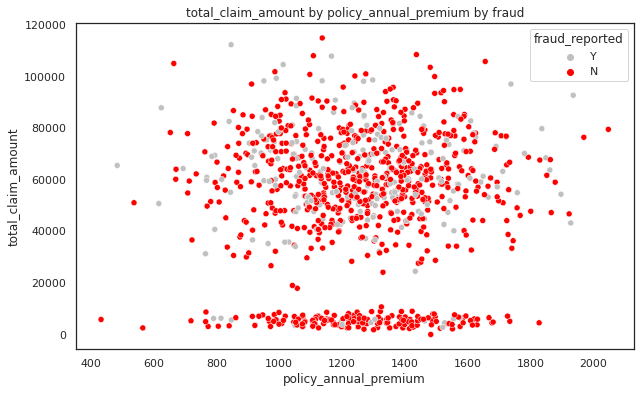

In [41]:
#no clear pattern but seems like claims close to 0 has most frauds

plt.figure(figsize=(10, 6))

sns.scatterplot(x="policy_annual_premium", y="total_claim_amount", 
            hue="fraud_reported", data=df,
            palette=['silver','red'])

plt.title("total_claim_amount by policy_annual_premium by fraud");

When I plotted seems like no umbrella limit with total claim amount, I noticed that those without umbrella limit have more density of fraud? This people may have little to lose which is why they don't purchase umbrella. Inversely, those who purchase have a lot of asset and a lot to lose so may be less prone to fraud.

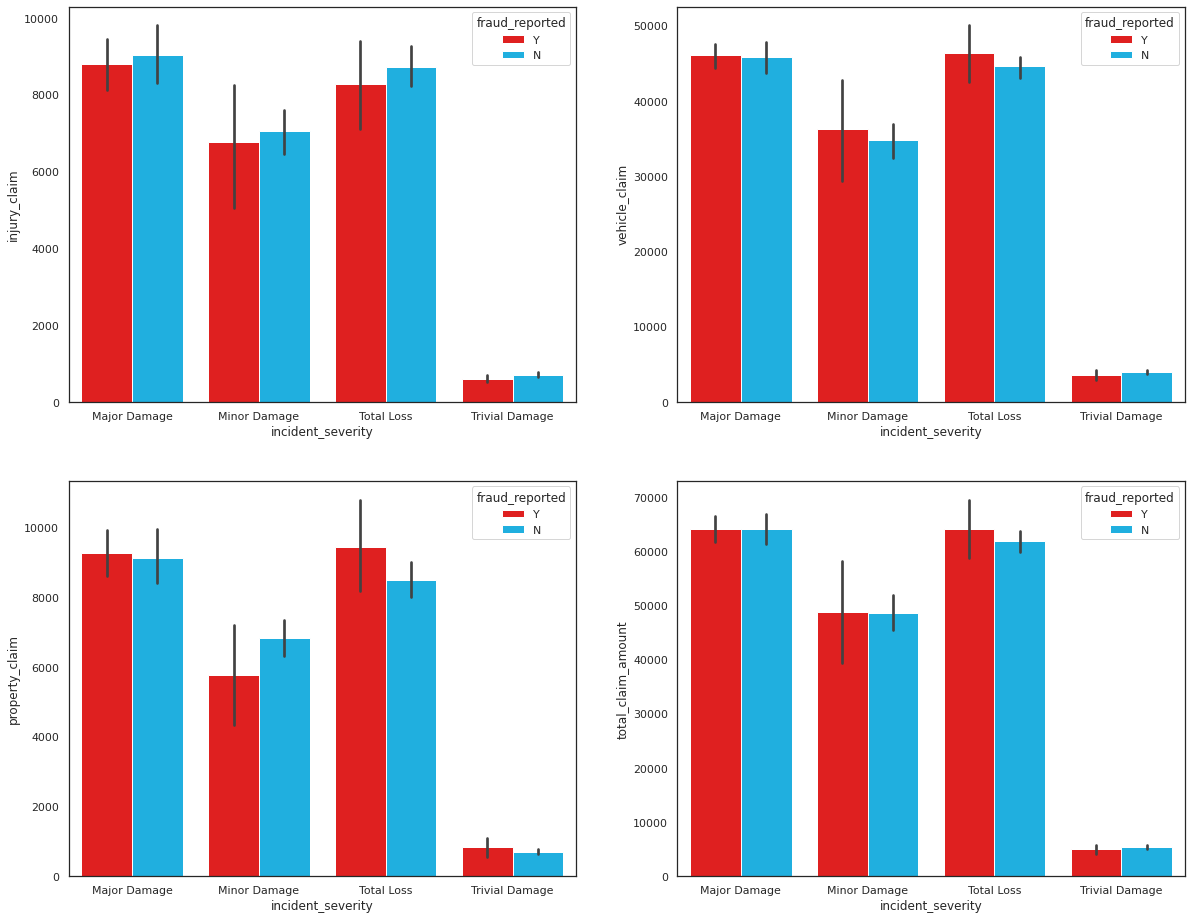

In [42]:
#severity and claims and fraud

fig, axes = plt.subplots(2,2, figsize=(20,16))

axes[0][0] = sns.barplot(x="incident_severity", y="injury_claim",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[0][0]);

axes[0][1] = sns.barplot(x="incident_severity", y="vehicle_claim",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[0][1]);

axes[1][0] = sns.barplot(x="incident_severity", y="property_claim",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[1][0]);

axes[1][1] = sns.barplot(x="incident_severity", y="total_claim_amount",
                hue="fraud_reported", 
                data=df, palette=['red','deepskyblue'], ax=axes[1][1]);

# vehicle claims and property claims have more frauds than injury claims
# does someone act more honestly after injury??

Next, I looked at different types of claims and incident severity and frauds. Vehicle claims and property claims have more frauds than injury claims. Perhaps damage of vehicles and property causes more perceived unfairness. Trend of fraud is less obvious in total claims against incident severity as after summing and aggregating across different types of claims, the variances cancel out each other.

In [43]:
#DV numerical code
df['fraud_reported'] = df['fraud_reported'].map({"Y":1, "N":0})
df['fraud_reported']

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [44]:
df['insured_sex'] = df['insured_sex'].map({"FEMALE":0,"MALE":1})

In [45]:
df['capital-loss']=df['capital-loss']*(-1)

In [46]:
df['capital-loss'].max()

111100

In [47]:
#check that they are coded

df['pclaim_severity_int'] = df['property_claim']*df['incident_severity']
df['vclaim_severity_int'] = df['vehicle_claim']*df['incident_severity']
df['iclaim_severity_int'] = df['injury_claim']*df['incident_severity']
df['tclaim_severity_int'] = df['total_claim_amount']*df['incident_severity']

df['prem_claim_int'] = df['policy_annual_premium']*df['total_claim_amount']
df['umlimit_tclaim_int'] = df['umbrella_limit']*df['total_claim_amount']

In [48]:
rem = ['insured_sex','incident_month']
dum_list = [e for e in nom_var if e not in rem]
len(dum_list)

14

In [49]:
dum = pd.get_dummies(df[dum_list], drop_first=True)
dum.head()

,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,police_report_available_Undocumented,police_report_available_YES,incident_state_NY,incident_state_OH,incident_state_PA,...,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
dum.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df_dummied = pd.concat([dum, df], axis=1)

In [51]:
df_dummied.drop(nom_var, axis=1, inplace=True)

In [52]:
df_dummied.head()

,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,police_report_available_Undocumented,police_report_available_YES,incident_state_NY,incident_state_OH,incident_state_PA,...,property_claim,vehicle_claim,auto_year,fraud_reported,pclaim_severity_int,vclaim_severity_int,iclaim_severity_int,tclaim_severity_int,prem_claim_int,umlimit_tclaim_int
0,0,0,0,0,0,0,1,0,0,0,...,13020,52080,2004,1,Major DamageMajor DamageMajor DamageMajor Dama...,Major DamageMajor DamageMajor DamageMajor Dama...,Major DamageMajor DamageMajor DamageMajor Dama...,Major DamageMajor DamageMajor DamageMajor Dama...,100748825.1,0
1,0,1,0,0,0,1,0,0,0,0,...,780,3510,2007,1,Minor DamageMinor DamageMinor DamageMinor Dama...,Minor DamageMinor DamageMinor DamageMinor Dama...,Minor DamageMinor DamageMinor DamageMinor Dama...,Minor DamageMinor DamageMinor DamageMinor Dama...,6069905.4,25350000000
2,0,0,1,0,0,0,0,1,0,0,...,3850,23100,2007,0,Minor DamageMinor DamageMinor DamageMinor Dama...,Minor DamageMinor DamageMinor DamageMinor Dama...,Minor DamageMinor DamageMinor DamageMinor Dama...,Minor DamageMinor DamageMinor DamageMinor Dama...,48965301.0,173250000000
3,0,0,0,1,0,0,0,0,1,0,...,6340,50720,2014,1,Major DamageMajor DamageMajor DamageMajor Dama...,Major DamageMajor DamageMajor DamageMajor Dama...,Major DamageMajor DamageMajor DamageMajor Dama...,Major DamageMajor DamageMajor DamageMajor Dama...,89757916.0,380400000000
4,0,0,0,1,0,0,0,1,0,0,...,650,4550,2009,0,Minor DamageMinor DamageMinor DamageMinor Dama...,Minor DamageMinor DamageMinor DamageMinor Dama...,Minor DamageMinor DamageMinor DamageMinor Dama...,Minor DamageMinor DamageMinor DamageMinor Dama...,10295415.0,39000000000


In [53]:
df_dummied.isnull().sum().any()

False

In [54]:
df_dummied['umbrella_limit'].sort_values(ascending=True)

0             0
622           0
623           0
624           0
625           0
         ...   
700     9000000
88      9000000
975     9000000
115    10000000
430    10000000
Name: umbrella_limit, Length: 1000, dtype: int64

In [55]:
dd = df_dummied.describe()
dd.loc['min']


insured_relationship_not-in-family          0.0
insured_relationship_other-relative         0.0
insured_relationship_own-child              0.0
insured_relationship_unmarried              0.0
insured_relationship_wife                   0.0
                                         ...   
vehicle_claim                              70.0
auto_year                                1995.0
fraud_reported                              0.0
prem_claim_int                         148253.0
umlimit_tclaim_int                          0.0
Name: min, Length: 105, dtype: float64

In [56]:
x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

Baseline accuracy score
As our dataset is imbalance, accuracy is not a good measure of success. A high accuracy can be achieved by a poor model that only selects the majority class, hence, not detecting and measuring the accuracy of classifying the class of interest. In fact, predicting only the majority class will give an accuracy of 75%, specificity of 100% but a sensitivity of 0%.

If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have a score as shown below:

Sensitivity: 1.0
Specificity: 0.0
Precision: 0.248
F1 score: 0.397
ROC AUC Score: 0.50
As identifying as many frauds as possible is the goal, the F1 score of 0.397 was used as a baseline. However, investigations into frauds can be time consuming and expensive and may even affect customer experience. Thus, ROC AUC score will also be used to measure how well we distinguish between Fraud and legit claims. The baseline ROC AUC score is 0.50. I am to have a ROC AUC of at least 0.70.

In [58]:
#baseline accuracy = 75.2%

y_test.value_counts(normalize=True)

0    0.752
1    0.248
Name: fraud_reported, dtype: float64

In [59]:
y_test.value_counts()

0    188
1     62
Name: fraud_reported, dtype: int64

In [60]:
base_recall = 62/(62)
base_speci = 0/(188)
base_preci = 62/(250)
base_f1 = 2*base_recall*base_preci/(base_recall+base_preci)


df_prob = pd.DataFrame()
df_prob['y']=y_test
df_prob['pred']=1
auc_score = roc_auc_score(df_prob['y'], df_prob['pred'])


print("If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have an:")
print("")
print("Sensitivity:", base_recall)
print('Specificity:', base_speci)
print('Precision:', base_preci)
print('F1 score:', base_f1)
print('ROC AUC Score:', auc_score)

If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have an:

Sensitivity: 1.0
Specificity: 0.0
Precision: 0.248
F1 score: 0.3974358974358974
ROC AUC Score: 0.5


If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have an:

Sensitivity: 1.0
Specificity: 0.0
Precision: 0.248
F1 score: 0.3974358974358974
ROC AUC Score: 0.5
As our dataset is imbalance, accuracy is not a good measure of success. A high accuracy can be achieved by a poor model that only selects the majority class, hence, not detecting and measuring the accuracy of classifying the class of interest. In fact, predicting only the majority class will give an accuracy of 75%, specificity of 100% but a sensitivity of 0%.

If we make a naive prediction that all claims are frauds, so that no frauds escape our watch, we will have a score as shown below:

Sensitivity: 1.0
Specificity: 0.0
Precision: 0.248
F1 score: 0.397
ROC AUC Score: 0.50
As identifying as many frauds as possible is the goal, the F1 score of 0.397 was used as a baseline. However, investigations into frauds can be time consuming and expensive and may even affect customer experience. Thus, ROC AUC score will also be used to measure how well we distinguish between Fraud and legit claims. The baseline ROC AUC score is 0.50. I am to have a ROC AUC of at least 0.70.

In [61]:
#function to use for scoring 

def scores(t, name):
    print (name, 'classification metric')
    print("CV scores:", round(t.best_score_,3))
    print("train score:", round(t.score(x_train, y_train),3))
    print("test score:", round(t.score(x_test, y_test),3))

    #Evaluation metrics
    predictions = t.predict(x_test)

    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

    sensi = TP/(TP + FN)
    speci= TN/(TN + FP)
    preci = TP/(TP + FP)
    f1= 2*(preci*sensi)/(preci+sensi)

    print(f'Sensitivity: {round(sensi,3)}')
    print(f'Specificity: {round(speci,3)}')
    print(f'Precision: {round(preci,3)}')
    print(f'F1: {round(f1,3)}')

    pred_proba = [i[1] for i in t.predict_proba(x_test)]
    auc_score = roc_auc_score(y_test, pred_proba)
    print('ROC AUC Score:', round(auc_score,3))

In [62]:
y_train.value_counts(normalize=True)

0    0.753333
1    0.246667
Name: fraud_reported, dtype: float64

A best practice for using the class weighting is to use the inverse of the class distribution present in the training dataset. For example, the class distribution of the test dataset is a 1:100 ratio for the minority class to the majority class. The inversion of this ratio could be used with 1 for the majority class and 100 for the minority class; for example:{0:1.0, 1:100.0}

In [63]:
# knn = KNeighborsClassifier()
# ss = StandardScaler()

knn_pipe = Pipeline([
    ("ss", StandardScaler()),
    ("knn", KNeighborsClassifier(n_jobs=-1))])

knn_values = {'knn__n_neighbors':[3,5,7,9,11],
              'knn__weights':['uniform', 'distance'],
              'knn__metric':['minkowski','euclidean','manhattan'],
              'knn__algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'knn__leaf_size':[1,2,3,4,5,6,7,8,9,10]
             }

In [64]:
#have to redefine since the smote has already altered the data

x = df_dummied.drop('fraud_reported', axis=1)
y = df_dummied['fraud_reported']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)